In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')

In [4]:
df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)

In [5]:
df_recent.columns

Index(['Total(minus solar)', 'Coal', 'Petroleum Liquids', 'Petroleum Coke',
       'Natural Gas', 'Other Gases', 'Nuclear',
       'Conventional Hydroelectric Power', 'other renewables', 'Wind',
       'all utility-scale solar', 'Geo- thermal', 'Biomass Total',
       'Biomass Wood', 'Biomass Waste', 'Hydro- electric Pumped Storage',
       'Other', 'Solar/PV', 'small-scale solar photovoltaic',
       'all utility-scale solar.1', 'Petroleum', 'Renewable Total',
       'Nonrenewable Total', 'Total', 'Renewable Percentage',
       'Nonrenewable Percentage'],
      dtype='object')

In [6]:
features = [
    'Coal',
    'Natural Gas', 
    'Other Gases',
    'Petroleum',
    'Nuclear'
]

In [7]:
df_recent[features].head()

,Coal,Natural Gas,Other Gases,Petroleum,Nuclear
date,,,,,
2001-01-01,177287.0,42389.0,718.0,18112.0,68707.0
2001-02-01,149735.0,37967.0,676.0,10342.0,61272.0
2001-03-01,155269.0,44364.0,769.0,11733.0,62141.0
2001-04-01,140671.0,45843.0,698.0,10864.0,56003.0
2001-05-01,151593.0,50934.0,785.0,10390.0,61512.0


In [8]:
df_past[features].head()

,Coal,Natural Gas,Other Gases,Petroleum,Nuclear
date,,,,,
1949-12-01,13550,3700,0,2850,0
1950-12-01,15450,4460,0,3370,0
1951-12-01,18520,5660,0,2870,0
1952-12-01,19540,6850,0,2970,0
1953-12-01,21880,7980,0,3840,0


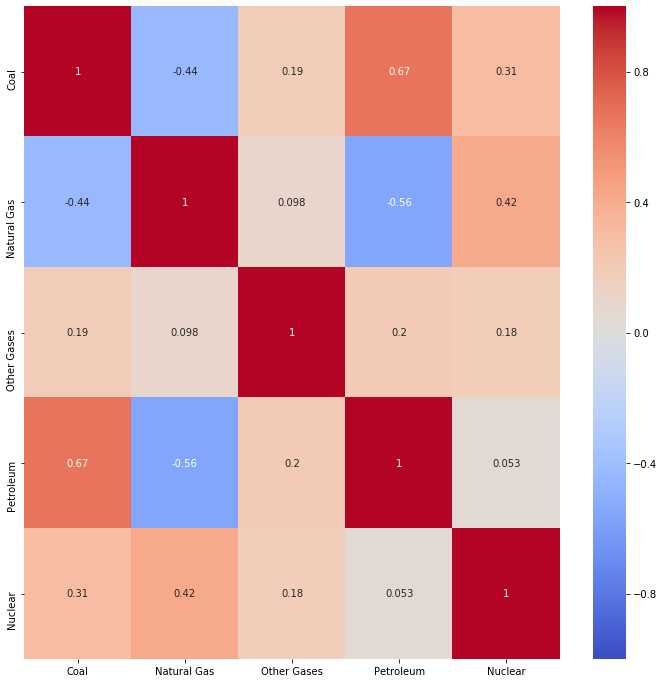

In [9]:
plt.figure(figsize = (12,12))
sns.heatmap(df_recent[features].corr(), cmap = 'coolwarm', vmin = -1, annot = True )

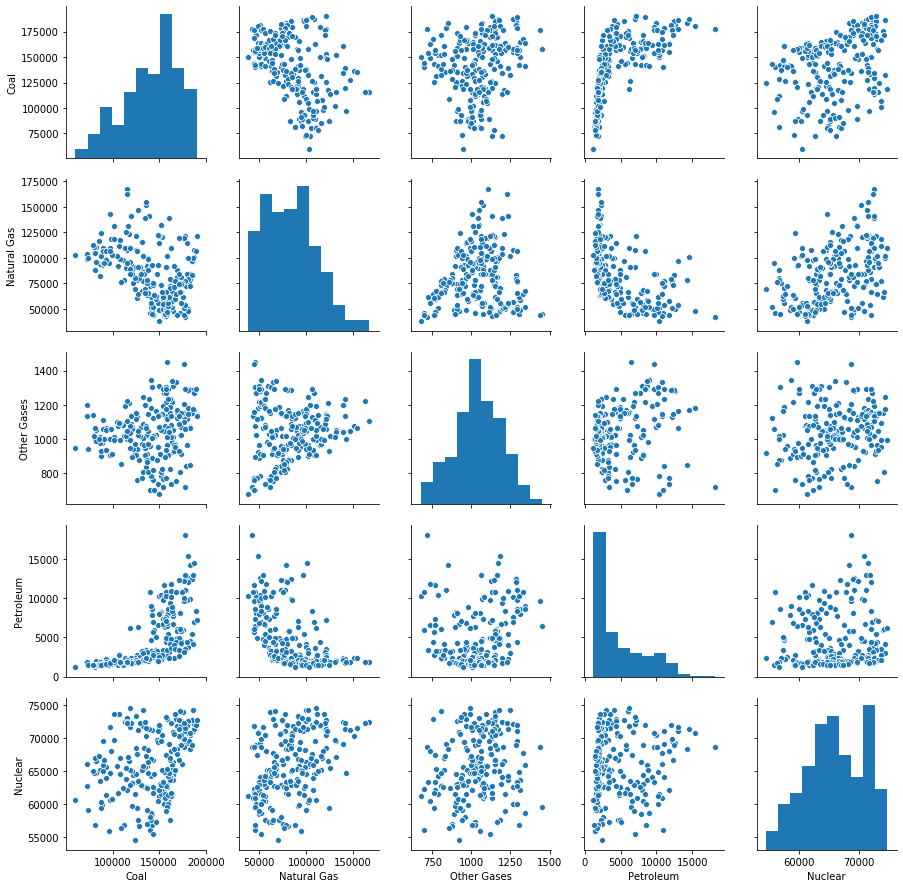

In [10]:
sns.pairplot(df_recent[features])

In [11]:
features.append('Nonrenewable Total')

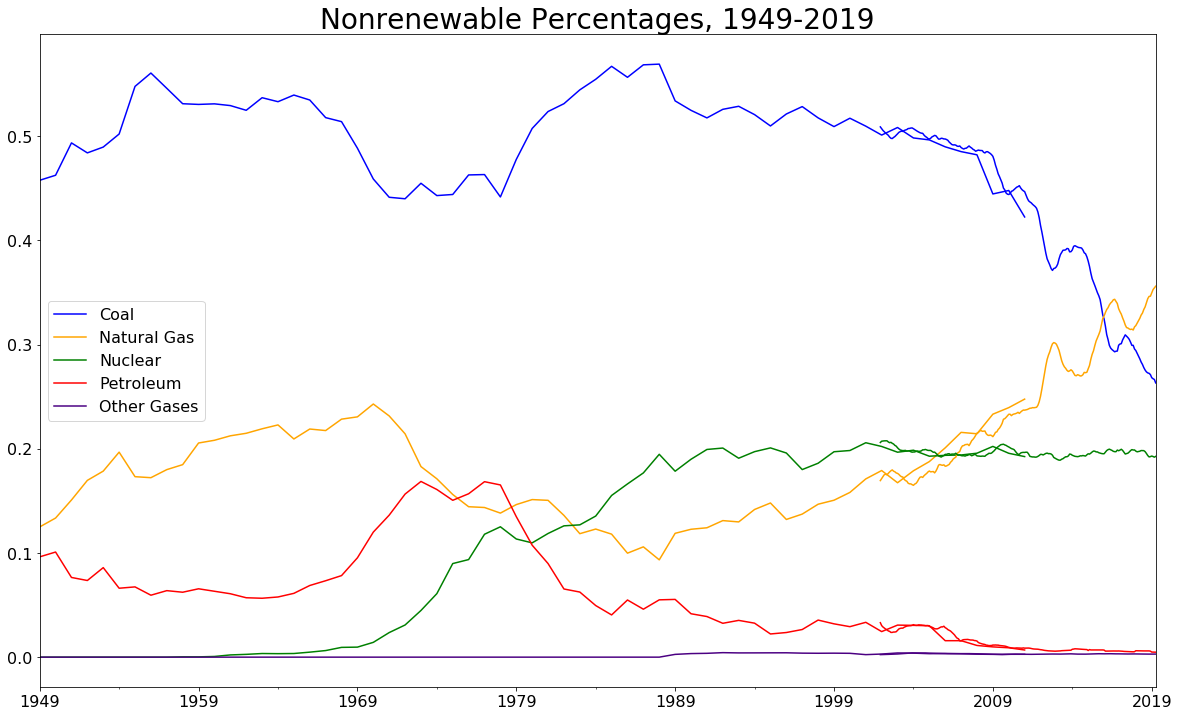

In [28]:
plt.figure(figsize = (20,12))
(df_past['Coal']/df_past['Total']).plot(label = 'Coal', color = 'blue')
(df_past['Natural Gas']/df_past['Total']).plot(label = 'Natural Gas', color = 'orange')
(df_past['Nuclear']/df_past['Total']).plot(label = 'Nuclear', color = 'green')
(df_past['Petroleum']/df_past['Total']).plot(label = 'Petroleum', color = 'red')
(df_past['Other Gases']/df_past['Total']).plot(label = "Other Gases", color = 'indigo')

(df_recent['Coal']/df_recent['Total']).rolling(12).mean().plot(label = 'Coal', color = 'blue')
(df_recent['Natural Gas']/df_recent['Total']).rolling(12).mean().plot(label = 'Natural Gas', color = 'orange')
(df_recent['Nuclear']/df_recent['Total']).rolling(12).mean().plot(label = 'Nuclear', color = 'green')
(df_recent['Petroleum']/df_recent['Total']).rolling(12).mean().plot(label = 'Petroleum', color = 'red')
(df_recent['Other Gases']/df_recent['Total']).rolling(12).mean().plot(label = "Other Gases", color = 'indigo')

plt.legend(['Coal', 'Natural Gas', 'Nuclear', "Petroleum", 'Other Gases'], fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("")
plt.title("Nonrenewable Percentages, 1949-2019", size = 28);

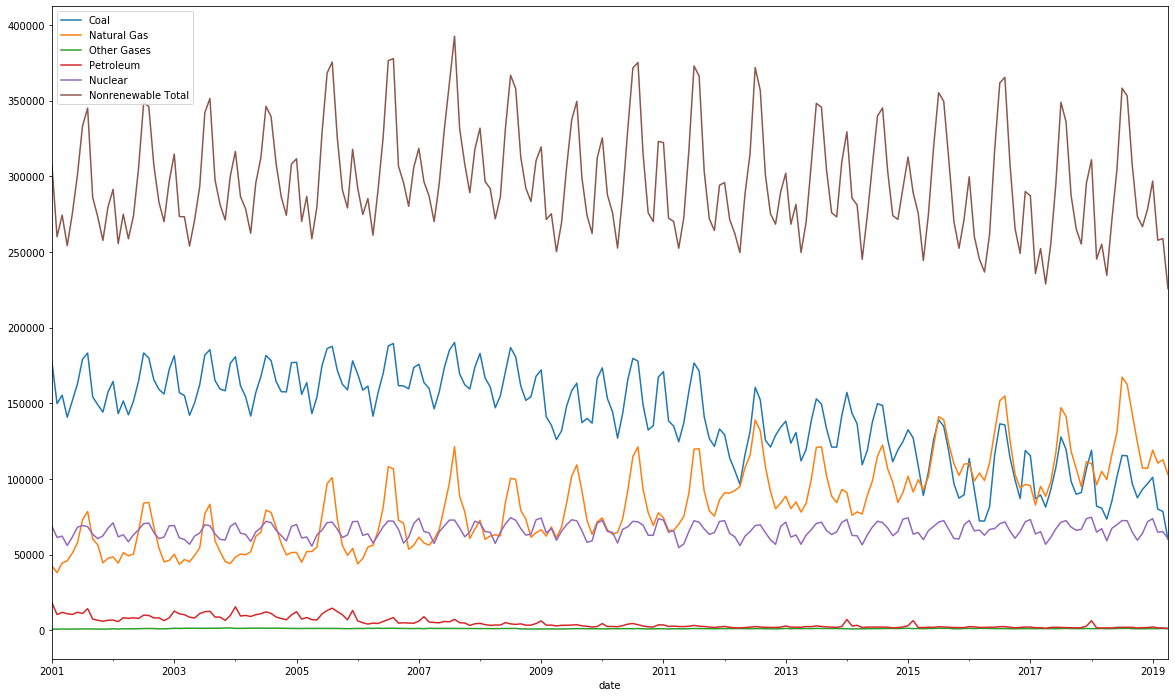

In [11]:

df_recent[features].plot(figsize = (20,12))

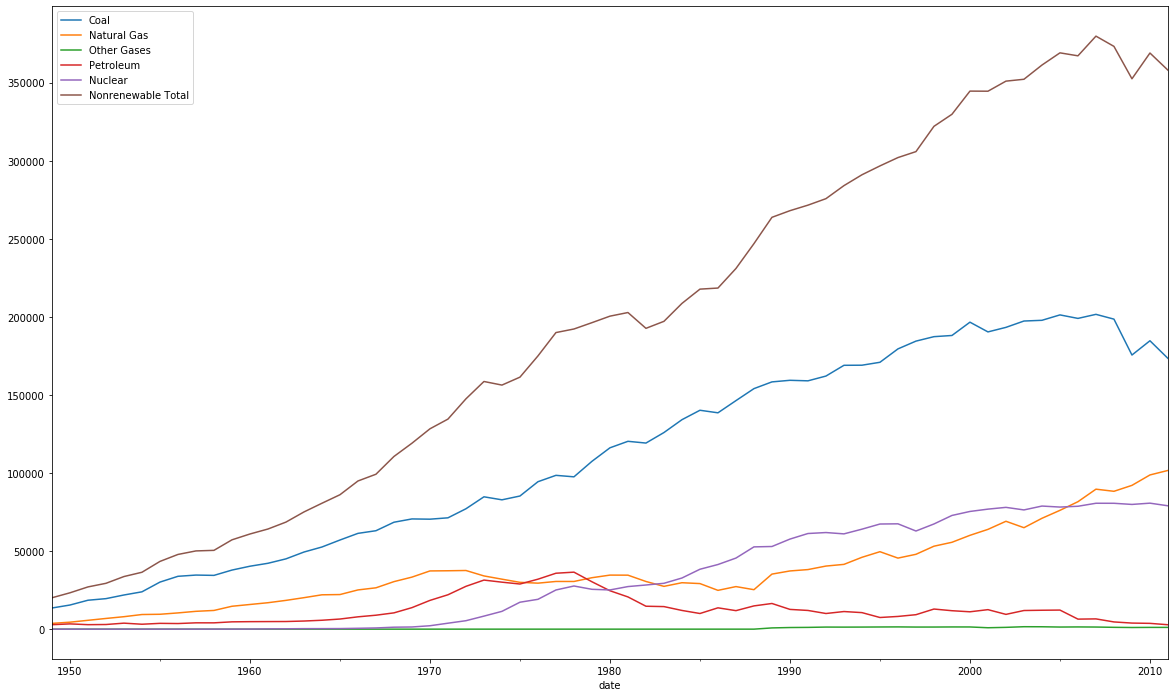

In [12]:
df_past[features].plot(figsize = (20,12))

## Coal

In [13]:
df_past['Coal'].describe()

count        63.000000
mean     112634.920635
std       63252.503454
min       13550.000000
25%       54855.000000
50%      116160.000000
75%      172185.000000
max      201650.000000
Name: Coal, dtype: float64

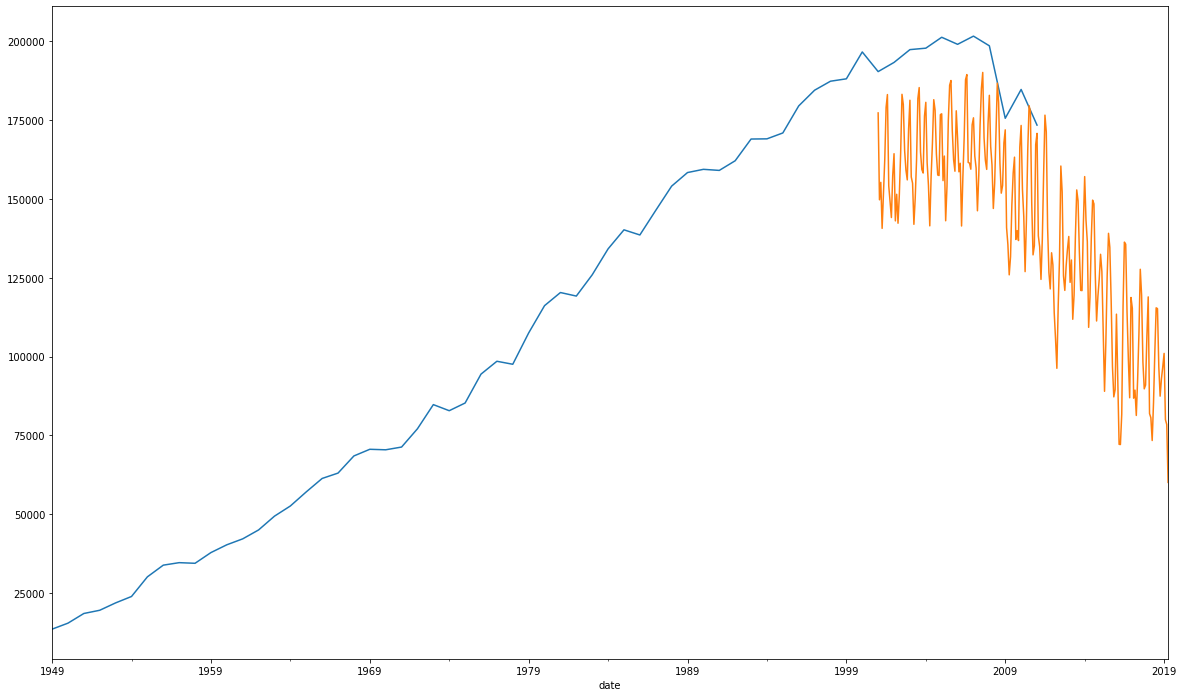

In [14]:
df_past['Coal'].plot(figsize = (20,12))
df_recent['Coal'].plot()

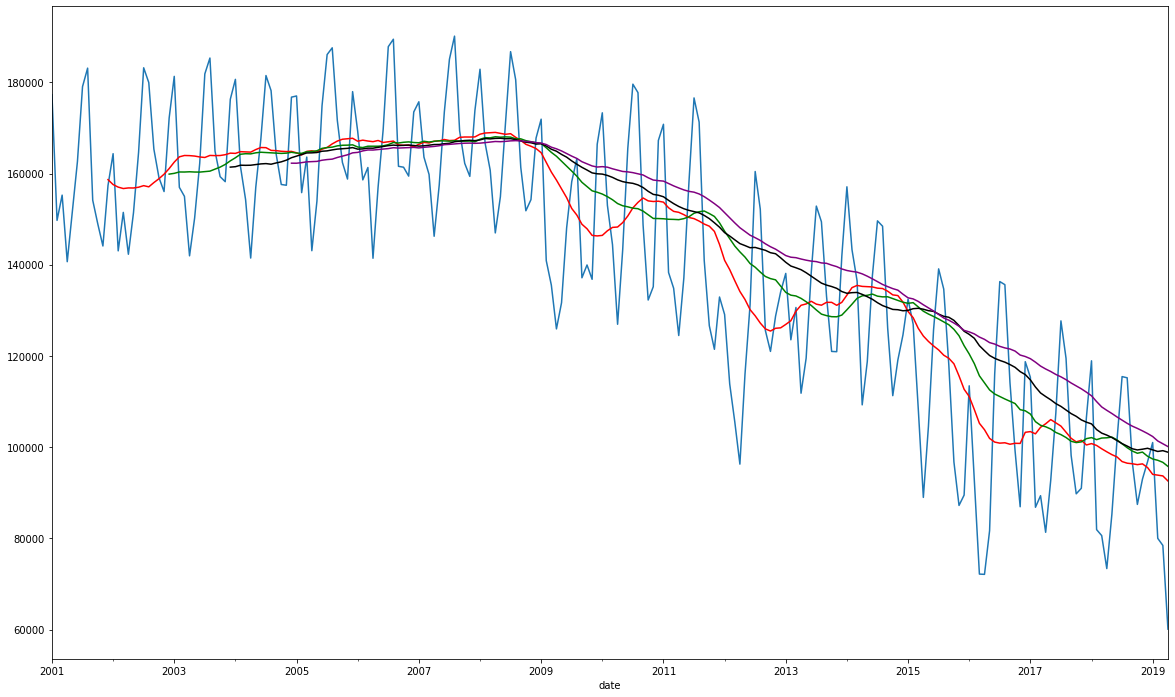

In [15]:
plt.figure(figsize = (20,12))
df_recent['Coal'].plot()
df_recent['Coal'].rolling(12).mean().plot(color = 'red')
df_recent['Coal'].rolling(24).mean().plot(color = 'green')
df_recent['Coal'].rolling(36).mean().plot(color = 'black')
df_recent['Coal'].rolling(48).mean().plot(color = 'purple')

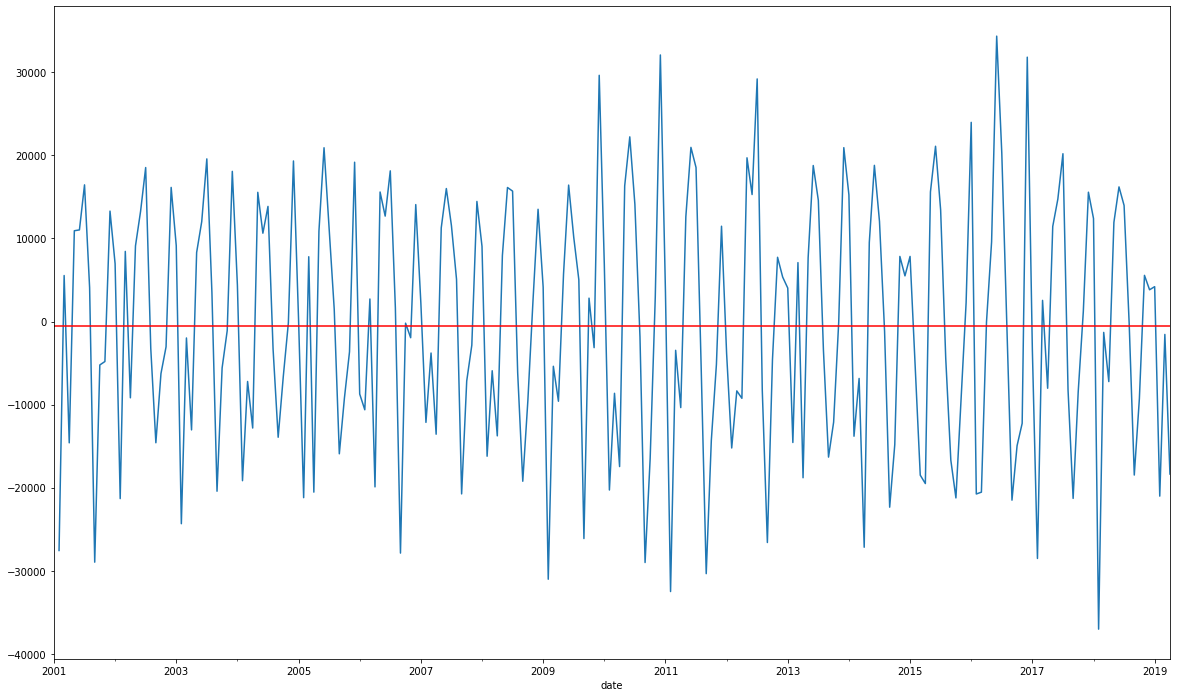

In [16]:
df_recent['Coal'].diff().plot(figsize = (20,12))
plt.axhline(-535, color = 'r')

In [17]:
df_recent['Coal'].diff().mean()

-535.1050228310502

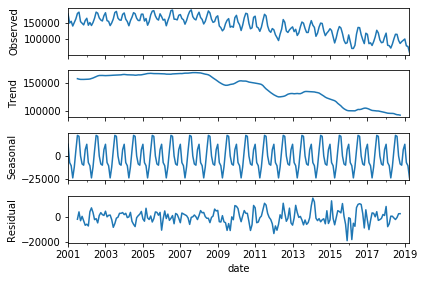

In [18]:
decomp = seasonal_decompose(df_recent['Coal'])
decomp.plot();

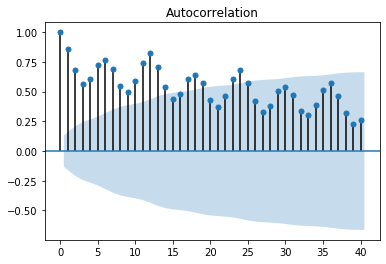

In [19]:
plot_acf(df_recent['Coal'], lags = 40);

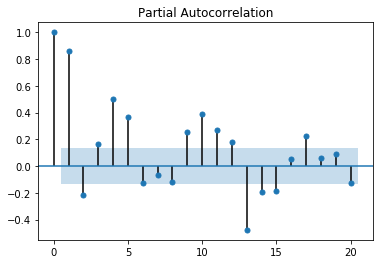

In [20]:
plot_pacf(df_recent['Coal'], lags = 20);

## Intersection of Coal and Natural Gas

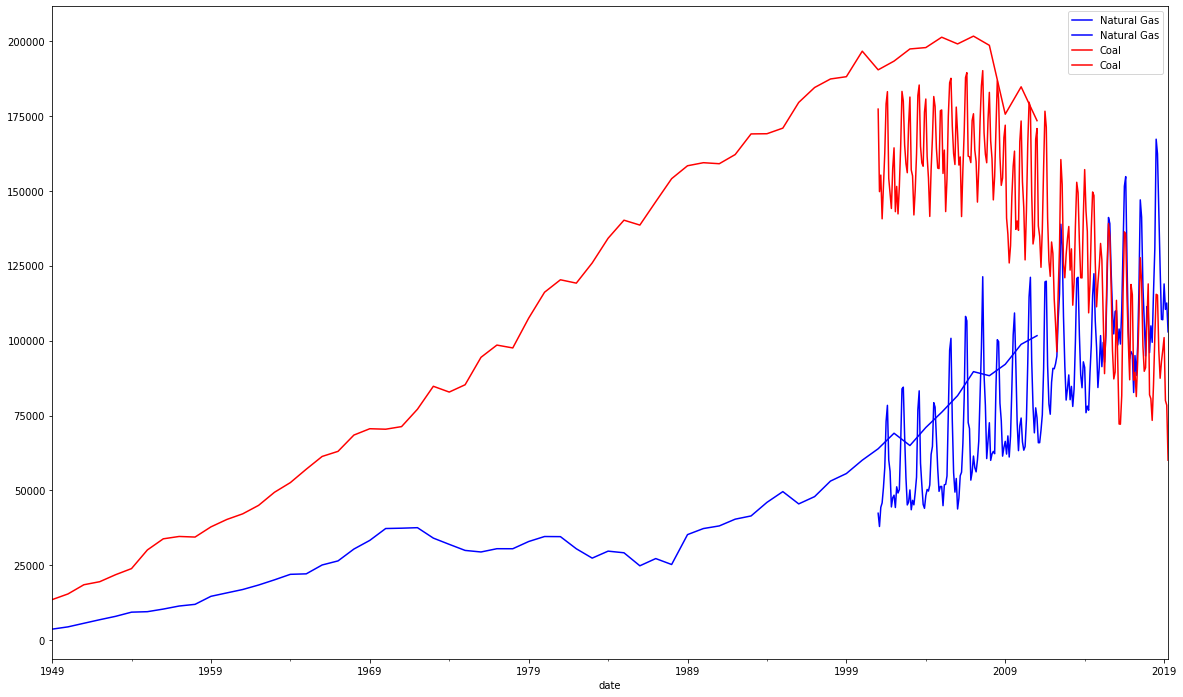

In [23]:
df_past['Natural Gas'].plot(figsize = (20,12), color = 'blue')
df_recent['Natural Gas'].plot(color = 'blue')
df_past['Coal'].plot(color = 'red')
df_recent['Coal'].plot(color = 'red')
plt.legend()

## Natural Gas


In [22]:
df_recent['Natural Gas'].describe()

count       220.000000
mean      83490.504545
std       27357.067541
min       37967.000000
25%       61380.250000
50%       80671.500000
75%      101738.750000
max      167250.000000
Name: Natural Gas, dtype: float64

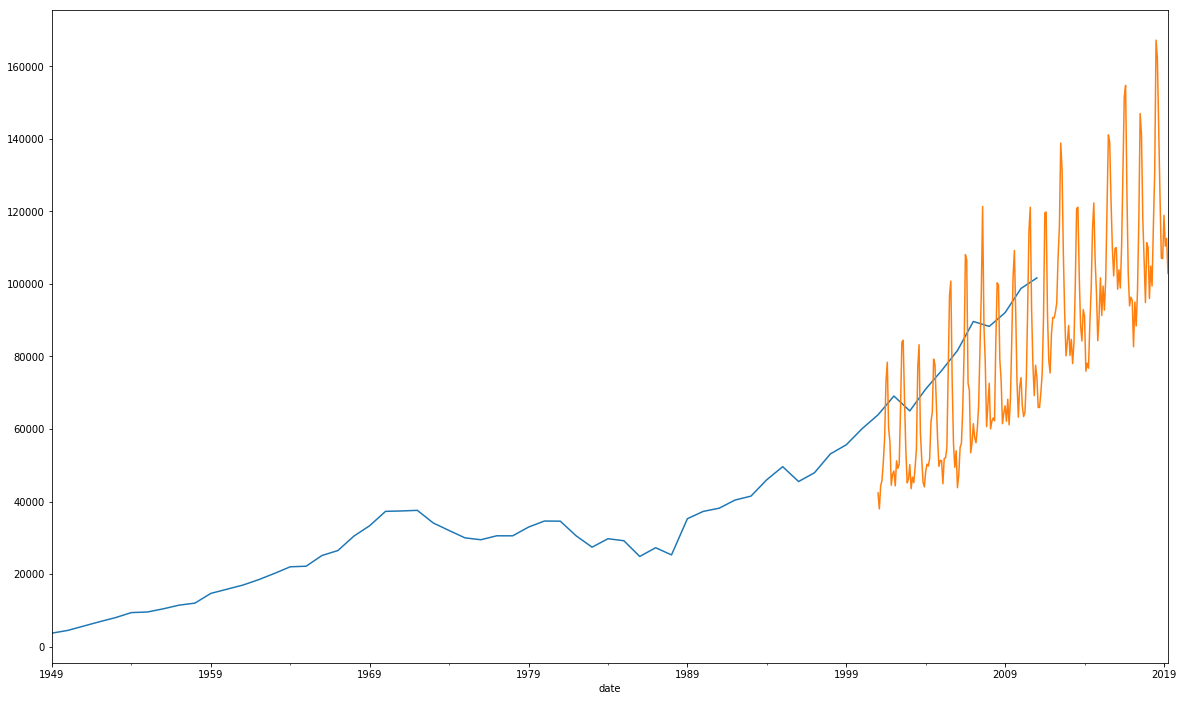

In [23]:
df_past['Natural Gas'].plot(figsize = (20,12))
df_recent['Natural Gas'].plot()

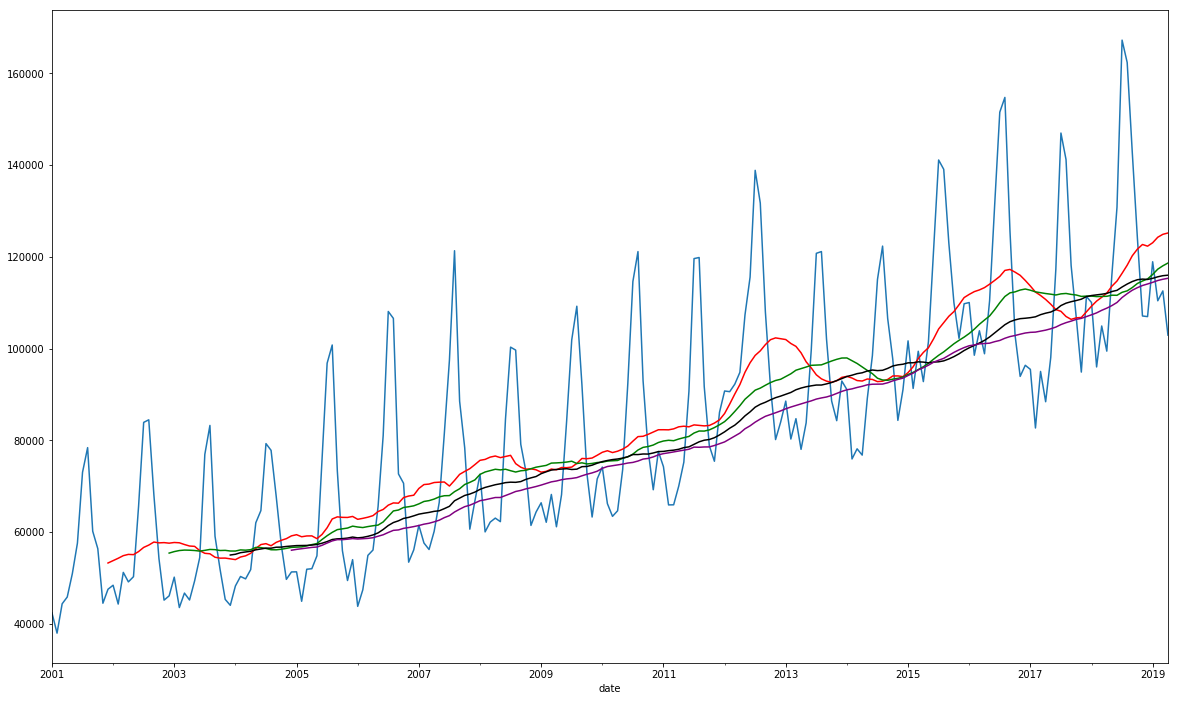

In [24]:
plt.figure(figsize = (20,12))
df_recent['Natural Gas'].plot()
df_recent['Natural Gas'].rolling(12).mean().plot(color = 'red')
df_recent['Natural Gas'].rolling(24).mean().plot(color = 'green')
df_recent['Natural Gas'].rolling(36).mean().plot(color = 'black')
df_recent['Natural Gas'].rolling(48).mean().plot(color = 'purple')

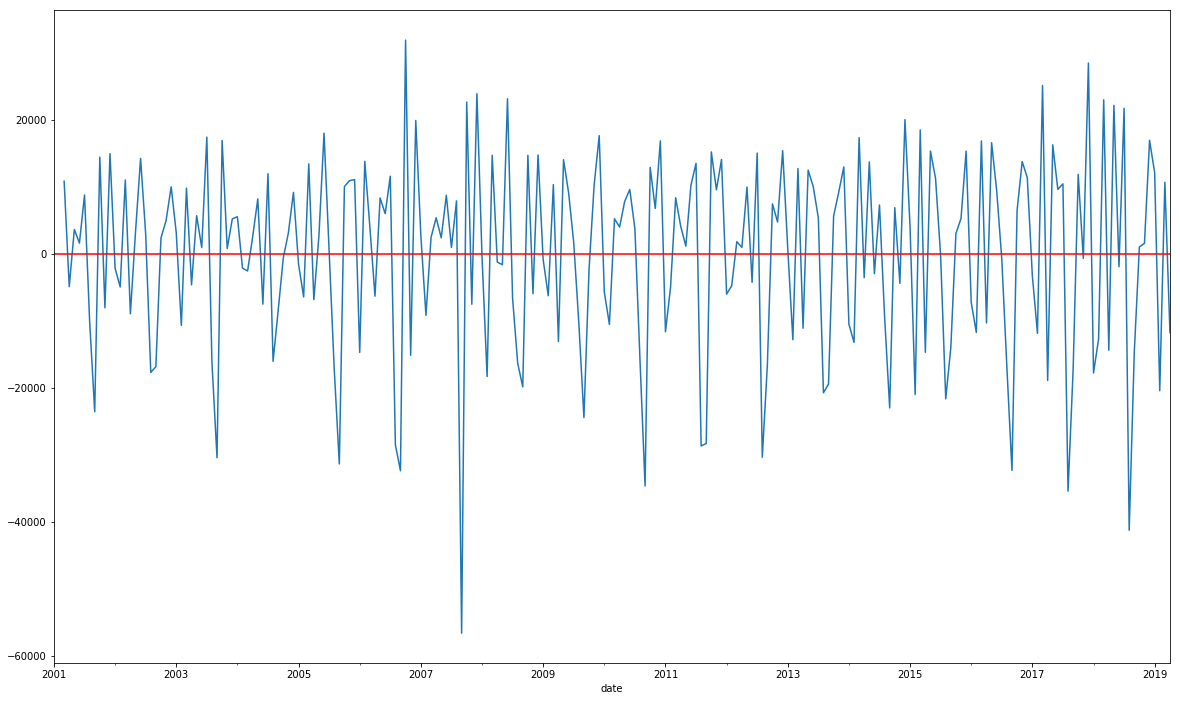

In [25]:
df_recent['Natural Gas'].diff().diff().plot(figsize = (20,12))
plt.axhline(-23, color = 'red')

In [26]:
df_recent['Natural Gas'].diff().diff().mean()

-23.926605504587155

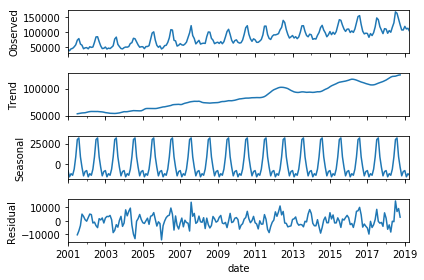

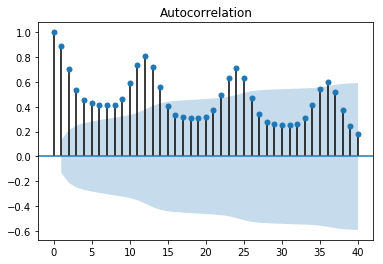

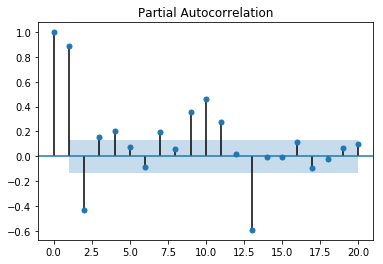

In [27]:
decomp = seasonal_decompose(df_recent['Natural Gas'])
decomp.plot()
plot_acf(df_recent['Natural Gas'], lags = 40)
plot_pacf(df_recent['Natural Gas'], lags = 20);

## Other Gases


In [28]:
df_recent['Other Gases'].describe()

count     220.000000
mean     1041.450000
std       152.397678
min       676.000000
25%       943.750000
50%      1047.000000
75%      1144.250000
max      1451.000000
Name: Other Gases, dtype: float64

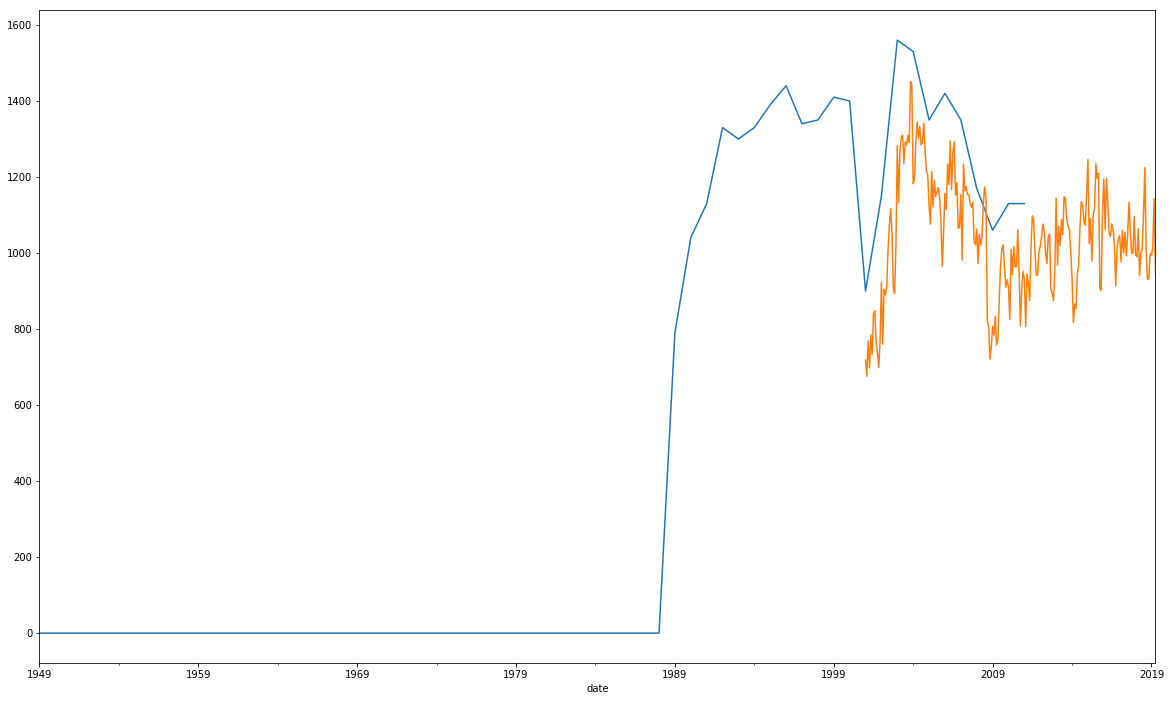

In [29]:
df_past['Other Gases'].plot(figsize = (20,12))
df_recent['Other Gases'].plot()

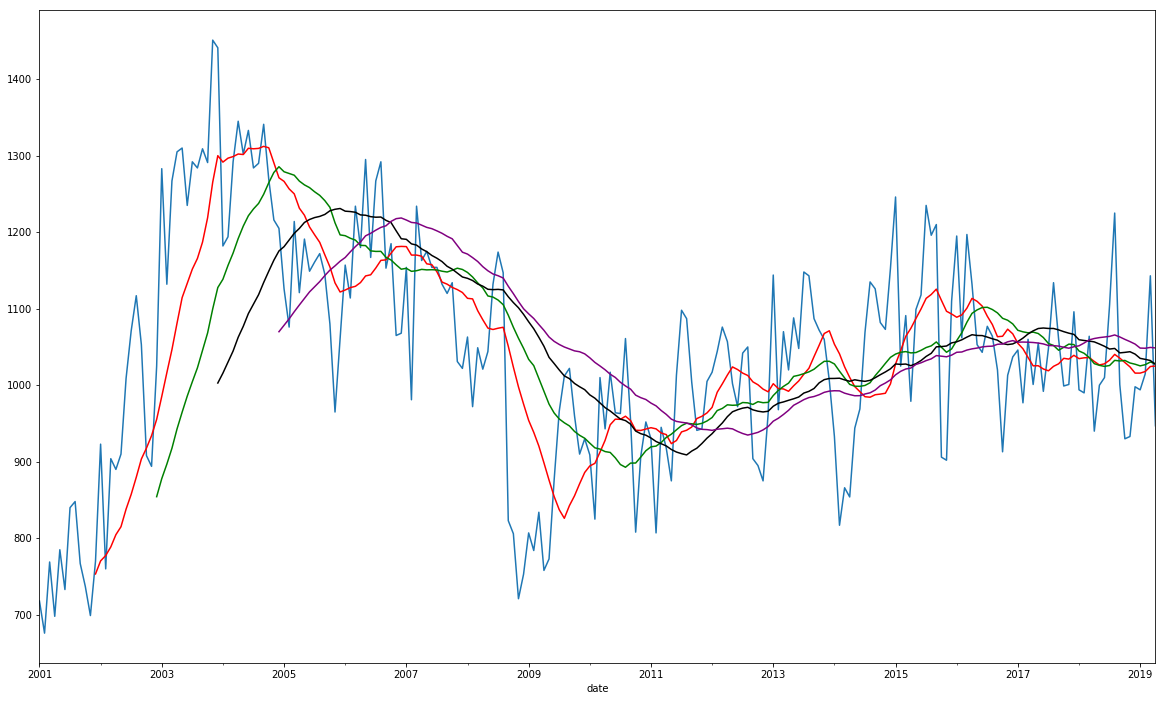

In [30]:
plt.figure(figsize = (20,12))
df_recent['Other Gases'].plot()
df_recent['Other Gases'].rolling(12).mean().plot(color = 'red')
df_recent['Other Gases'].rolling(24).mean().plot(color = 'green')
df_recent['Other Gases'].rolling(36).mean().plot(color = 'black')
df_recent['Other Gases'].rolling(48).mean().plot(color = 'purple')

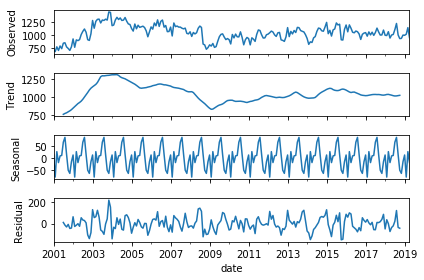

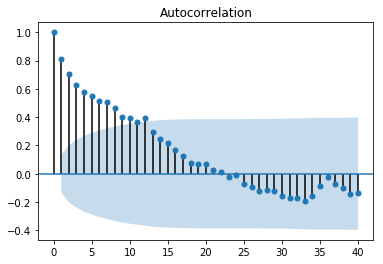

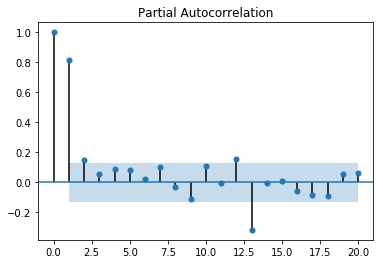

In [31]:
decomp = seasonal_decompose(df_recent['Other Gases'])
decomp.plot()
plot_acf(df_recent['Other Gases'], lags = 40)
plot_pacf(df_recent['Other Gases'], lags = 20);

## Nuclear


In [32]:
df_recent['Nuclear'].describe()

count      220.000000
mean     65970.459091
std       4881.694320
min      54547.000000
25%      62633.250000
50%      65650.000000
75%      70502.250000
max      74649.000000
Name: Nuclear, dtype: float64

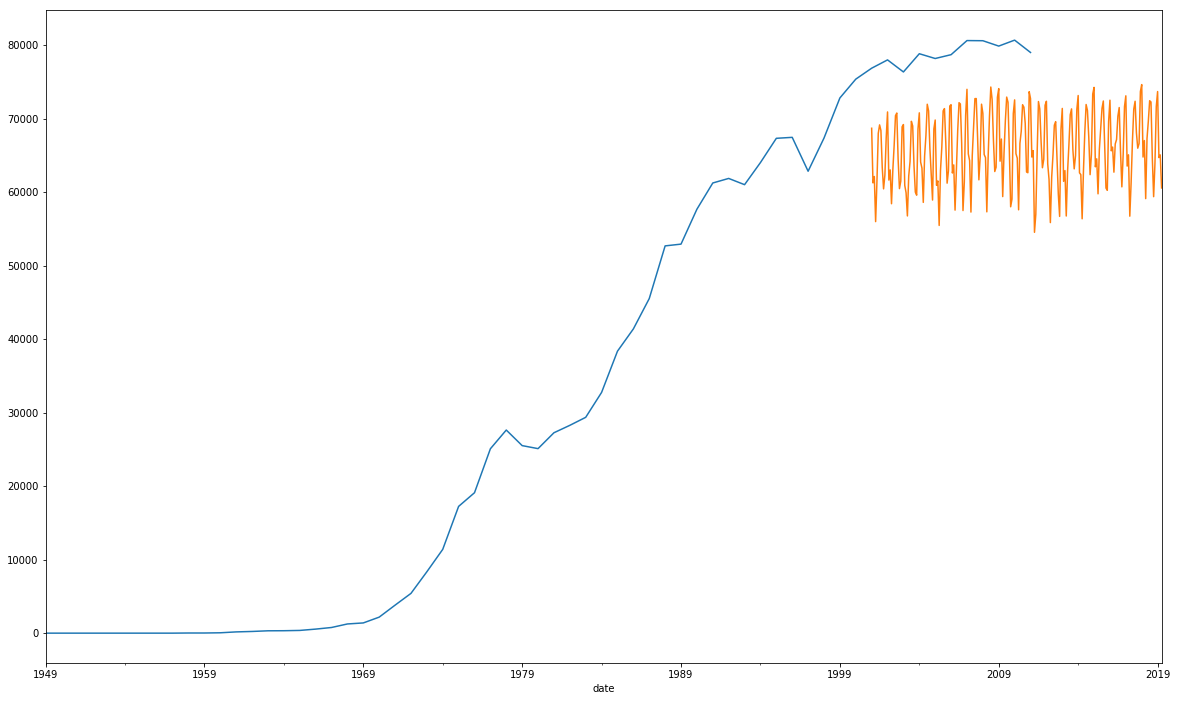

In [33]:
df_past['Nuclear'].plot(figsize = (20,12))
df_recent['Nuclear'].plot()

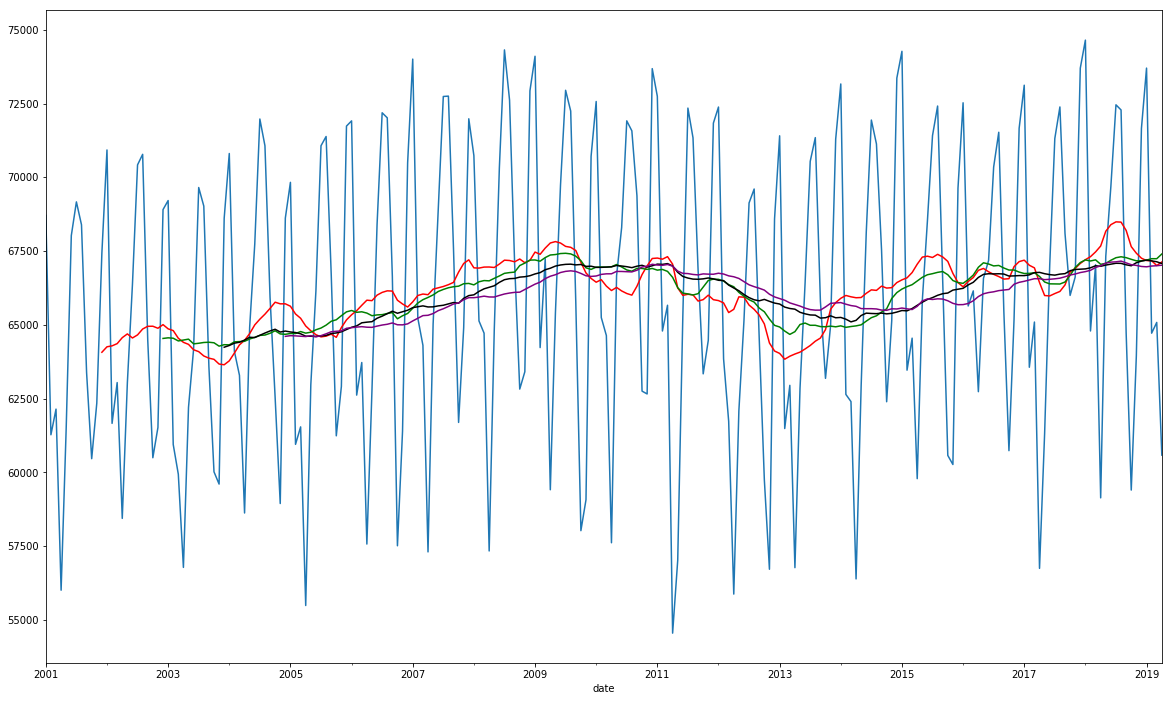

In [34]:
plt.figure(figsize = (20,12))
df_recent['Nuclear'].plot()
df_recent['Nuclear'].rolling(12).mean().plot(color = 'red')
df_recent['Nuclear'].rolling(24).mean().plot(color = 'green')
df_recent['Nuclear'].rolling(36).mean().plot(color = 'black')
df_recent['Nuclear'].rolling(48).mean().plot(color = 'purple')

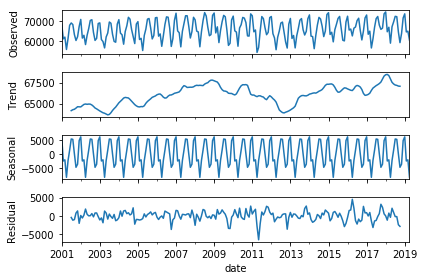

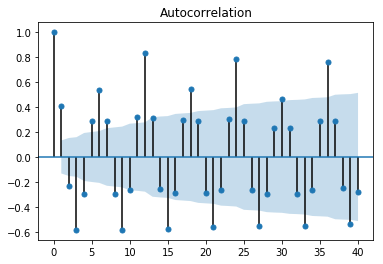

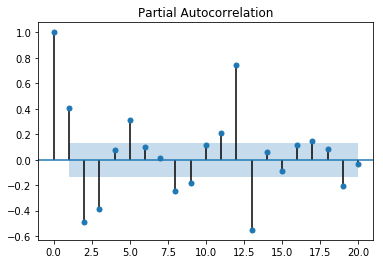

In [35]:
decomp = seasonal_decompose(df_recent['Nuclear'])
decomp.plot()
plot_acf(df_recent['Nuclear'], lags = 40)
plot_pacf(df_recent['Nuclear'], lags = 20);

## Petroleum

In [36]:
df_recent['Petroleum'].describe()

count      220.000000
mean      4772.063636
std       3548.721923
min       1222.000000
25%       2019.750000
50%       3198.500000
75%       6893.500000
max      18112.000000
Name: Petroleum, dtype: float64

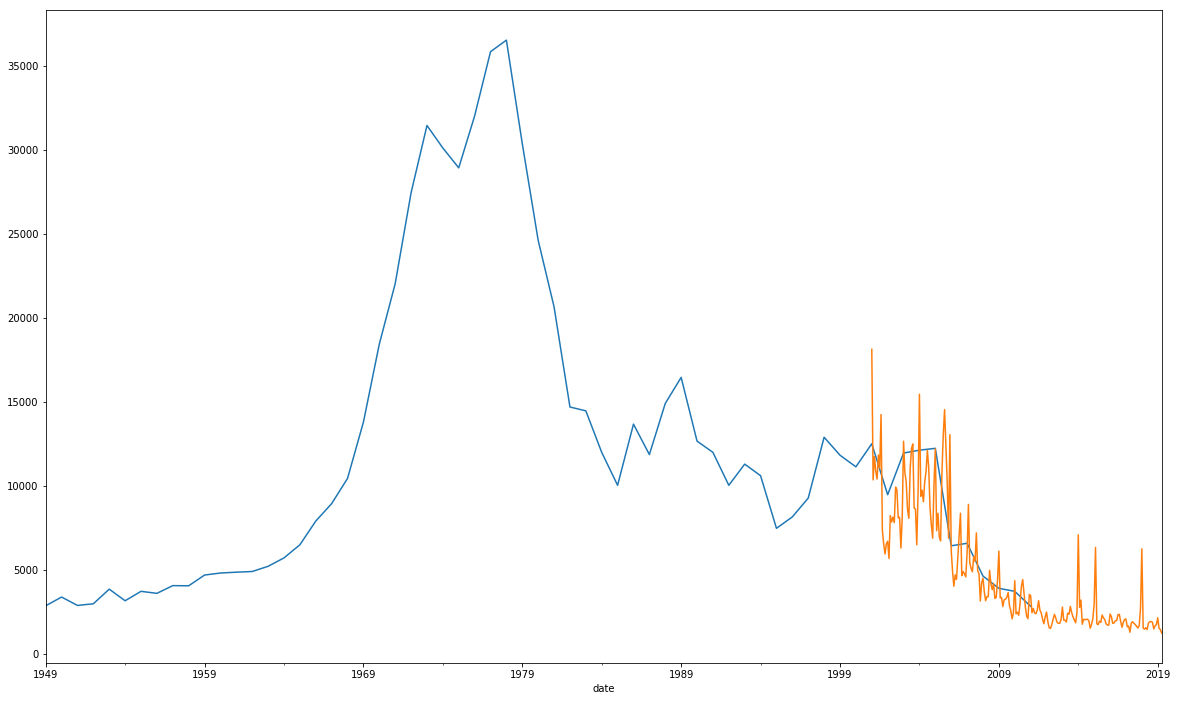

In [37]:
df_past['Petroleum'].plot(figsize = (20,12))
df_recent['Petroleum'].plot()

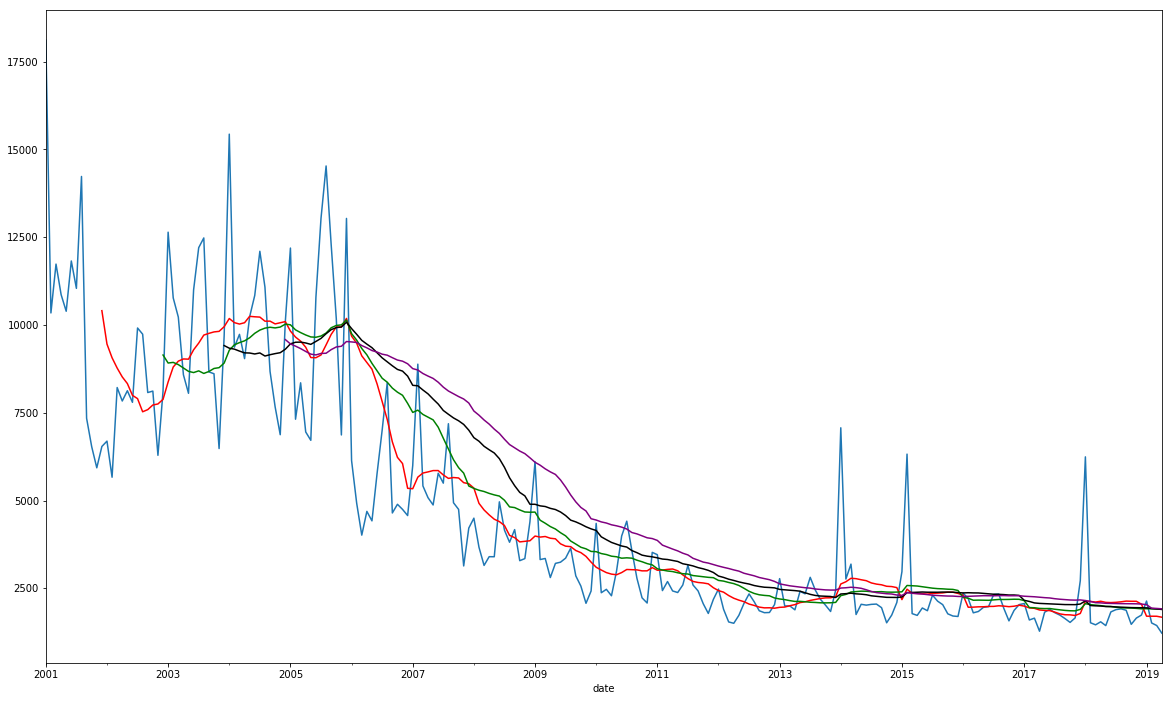

In [38]:
plt.figure(figsize = (20,12))
df_recent['Petroleum'].plot()
df_recent['Petroleum'].rolling(12).mean().plot(color = 'red')
df_recent['Petroleum'].rolling(24).mean().plot(color = 'green')
df_recent['Petroleum'].rolling(36).mean().plot(color = 'black')
df_recent['Petroleum'].rolling(48).mean().plot(color = 'purple')

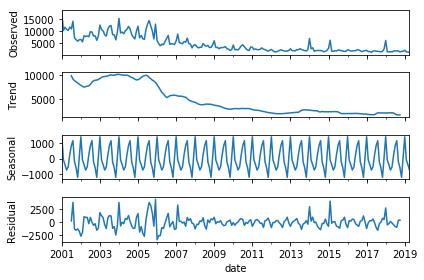

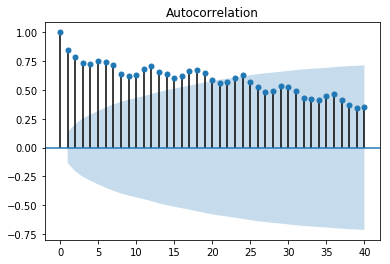

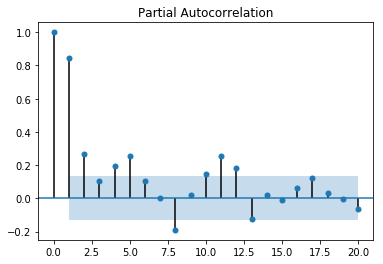

In [39]:
decomp = seasonal_decompose(df_recent['Petroleum'])
decomp.plot()
plot_acf(df_recent['Petroleum'], lags = 40)
plot_pacf(df_recent['Petroleum'], lags = 20);

## Total


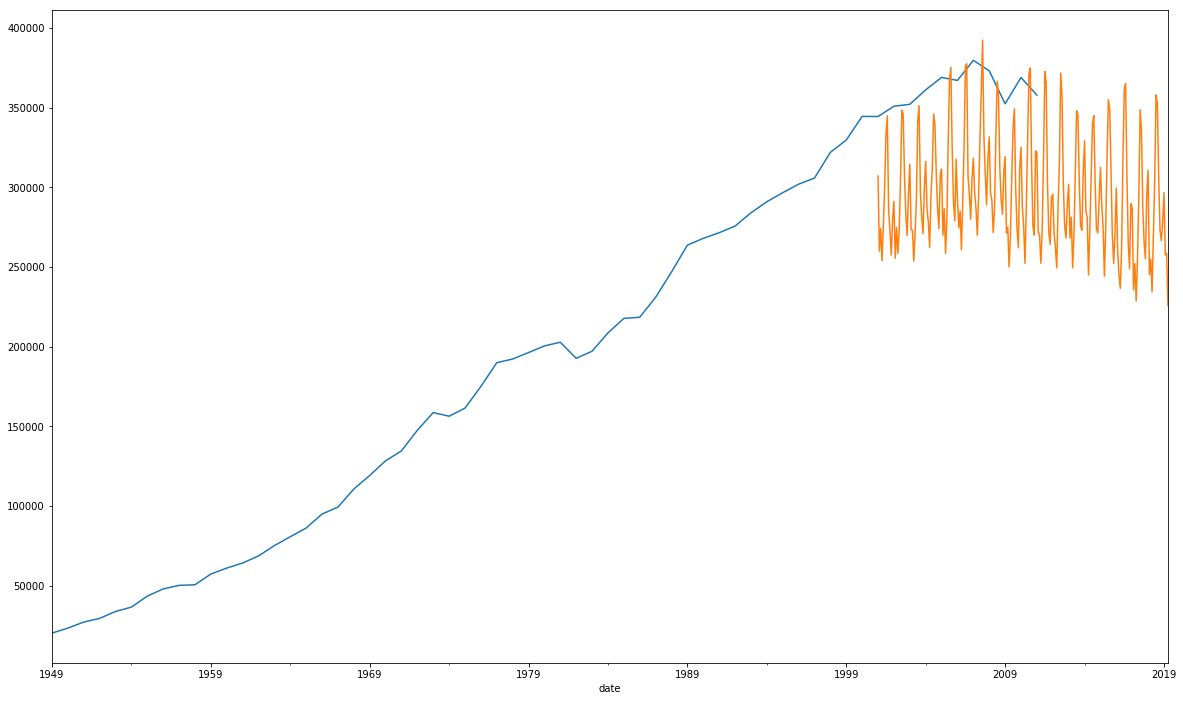

In [40]:
df_past['Nonrenewable Total'].plot(figsize = (20,12))
df_recent['Nonrenewable Total'].plot()

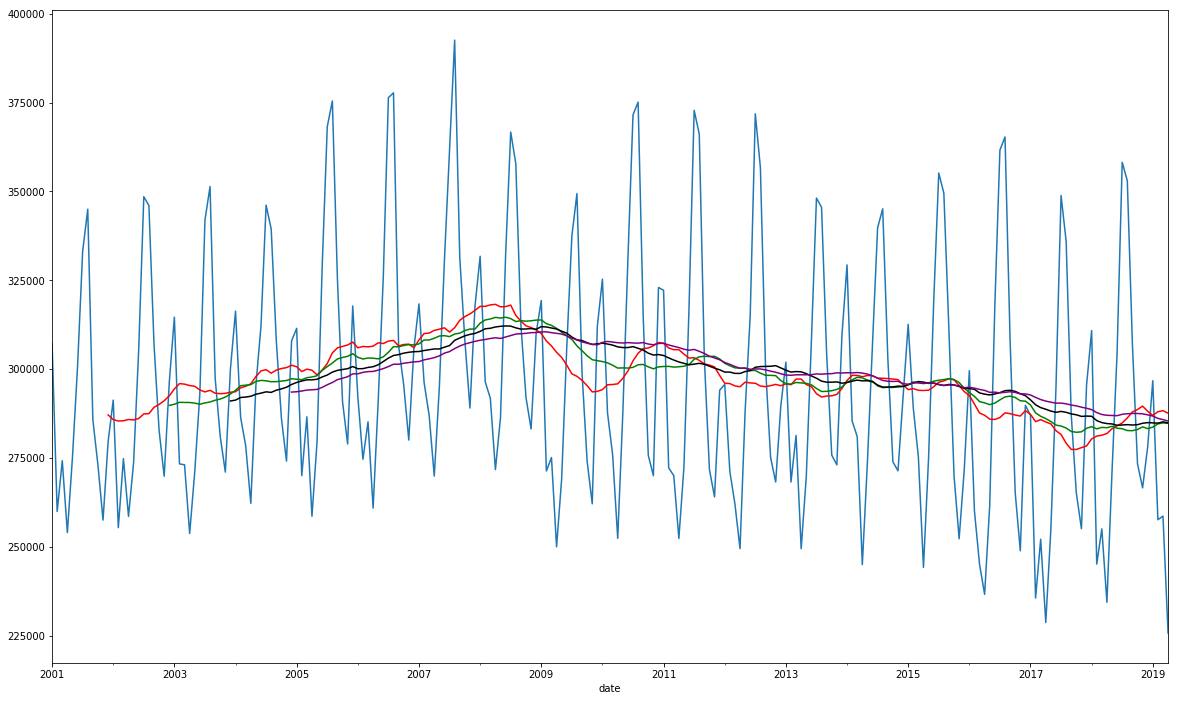

In [41]:
plt.figure(figsize = (20,12))
df_recent['Nonrenewable Total'].plot()
df_recent['Nonrenewable Total'].rolling(12).mean().plot(color = 'red')
df_recent['Nonrenewable Total'].rolling(24).mean().plot(color = 'green')
df_recent['Nonrenewable Total'].rolling(36).mean().plot(color = 'black')
df_recent['Nonrenewable Total'].rolling(48).mean().plot(color = 'purple')

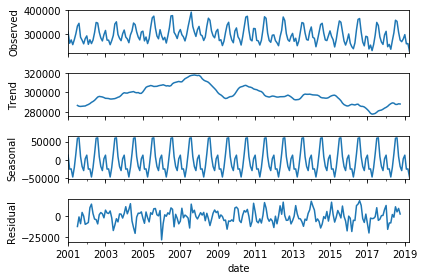

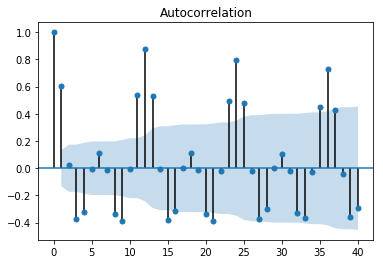

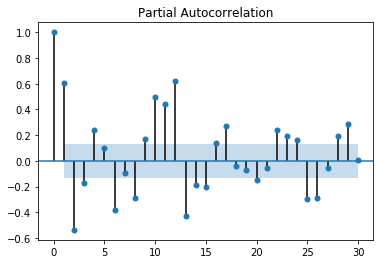

In [42]:
decomp = seasonal_decompose(df_recent['Nonrenewable Total'])
decomp.plot()
plot_acf(df_recent['Nonrenewable Total'], lags = 40)
plot_pacf(df_recent['Nonrenewable Total'], lags = 30);

## Percentage

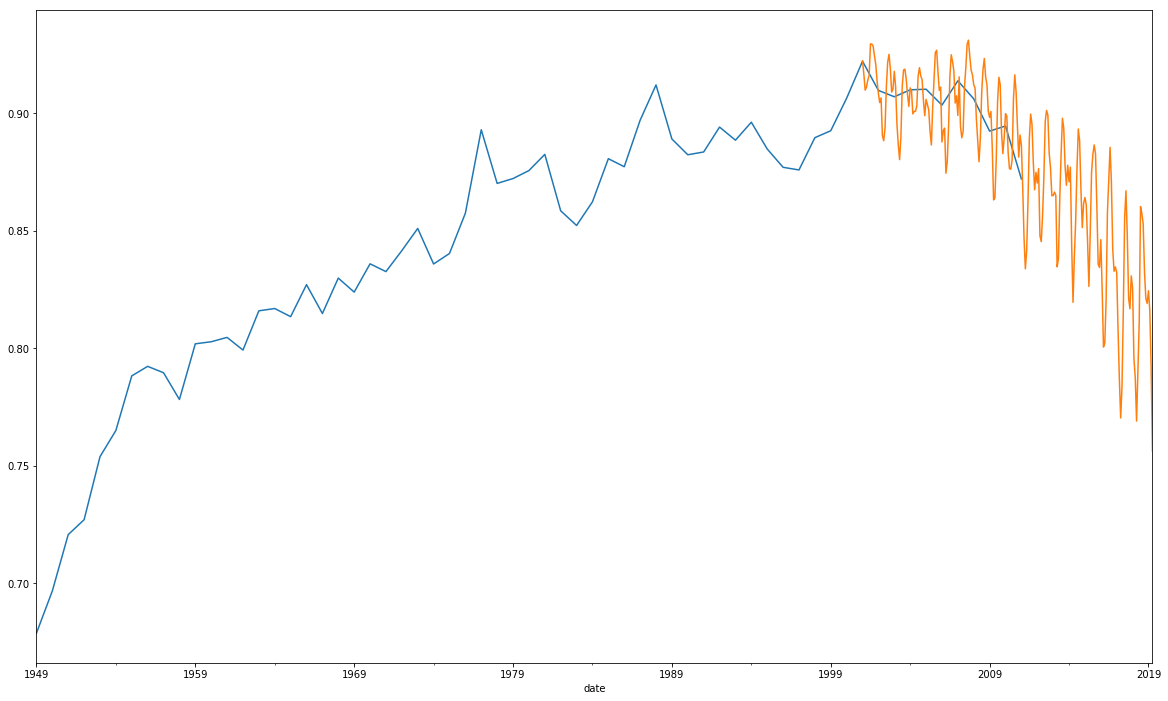

In [43]:
df_past['Nonrenewable Percentage'].plot(figsize = (20,12))
df_recent['Nonrenewable Percentage'].plot()

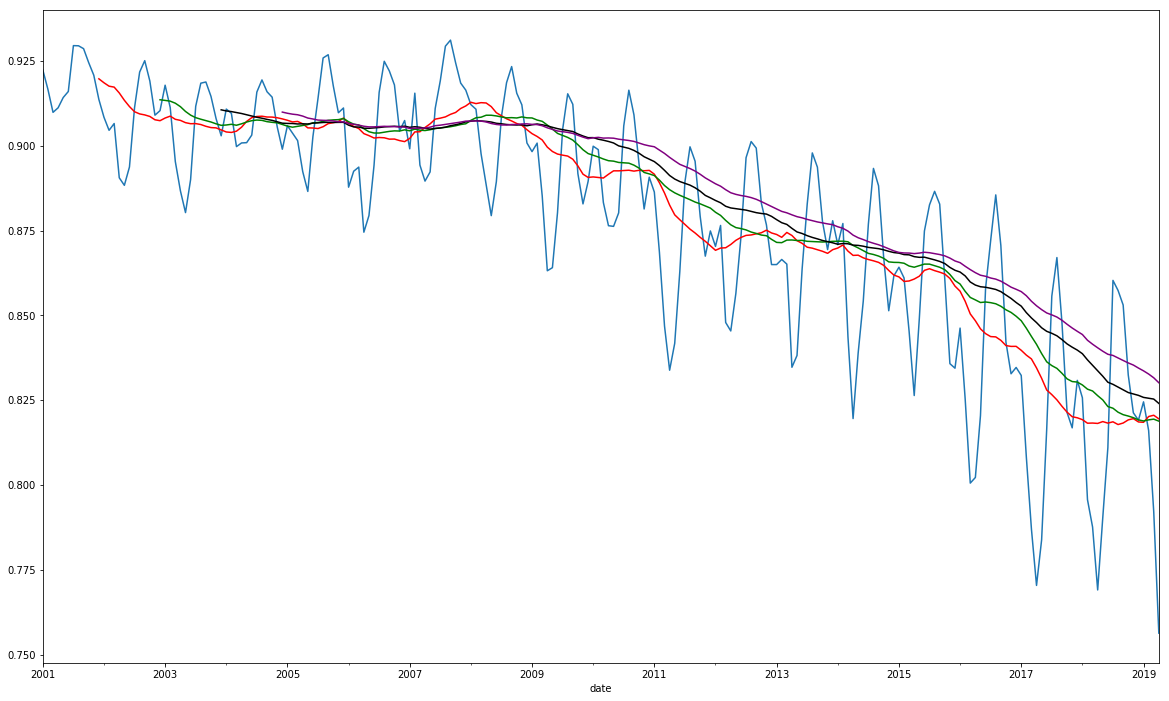

In [44]:
plt.figure(figsize = (20,12))
df_recent['Nonrenewable Percentage'].plot()
df_recent['Nonrenewable Percentage'].rolling(12).mean().plot(color = 'red')
df_recent['Nonrenewable Percentage'].rolling(24).mean().plot(color = 'green')
df_recent['Nonrenewable Percentage'].rolling(36).mean().plot(color = 'black')
df_recent['Nonrenewable Percentage'].rolling(48).mean().plot(color = 'purple')

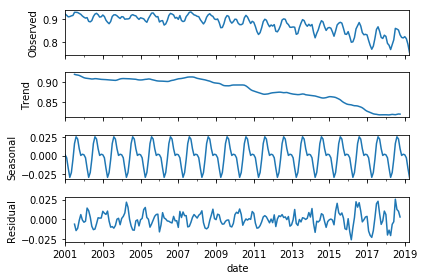

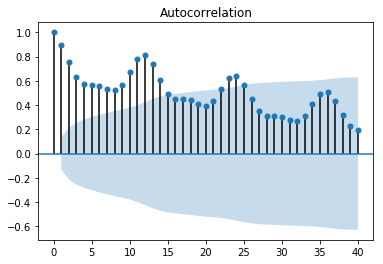

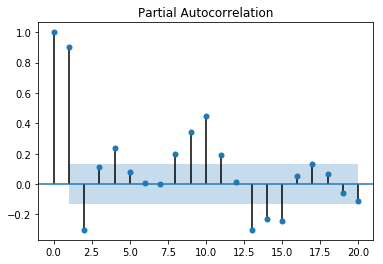

In [45]:
decomp = seasonal_decompose(df_recent['Nonrenewable Percentage'])
decomp.plot()
plot_acf(df_recent['Nonrenewable Percentage'], lags = 40)
plot_pacf(df_recent['Nonrenewable Percentage'], lags = 20);

## Mapping percentage of total for Specific industries

In [46]:
df_recent[features].max().sort_values(ascending = False)

Nonrenewable Total    392543.0
Coal                  190135.0
Natural Gas           167250.0
Nuclear                74649.0
Petroleum              18112.0
Other Gases             1451.0
dtype: float64

## Coal


In [47]:
(df_recent['Coal']/df_recent['Total']).describe()

count    220.000000
mean       0.420367
std        0.084951
min        0.201316
25%        0.363882
50%        0.440180
75%        0.492880
max        0.532274
dtype: float64

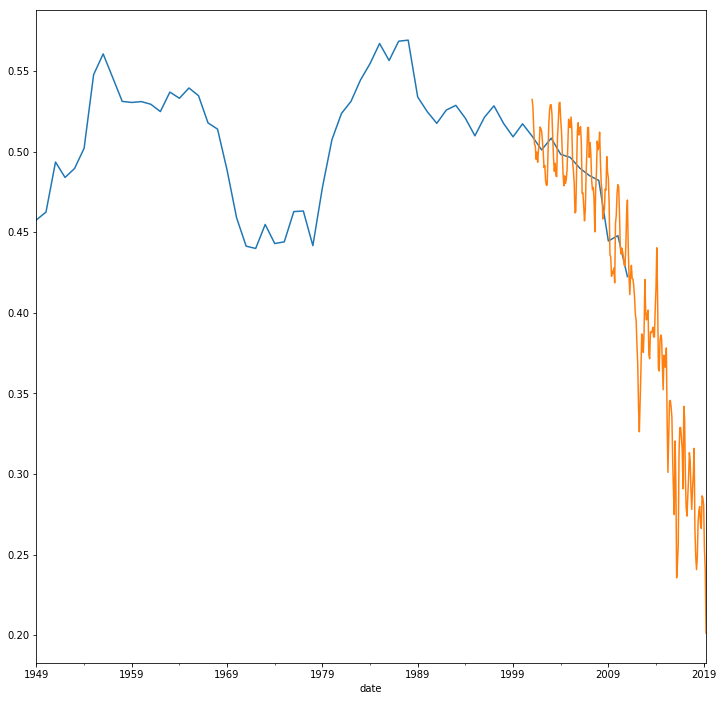

In [48]:
plt.figure(figsize = (12,12))
(df_past['Coal']/df_past['Total']).plot()
(df_recent['Coal']/df_recent['Total']).plot()

## Natural Gas

In [49]:
(df_recent['Natural Gas']/df_recent['Total']).describe()

count    220.000000
mean       0.245335
std        0.067130
min        0.127266
25%        0.190444
50%        0.240572
75%        0.300206
max        0.401722
dtype: float64

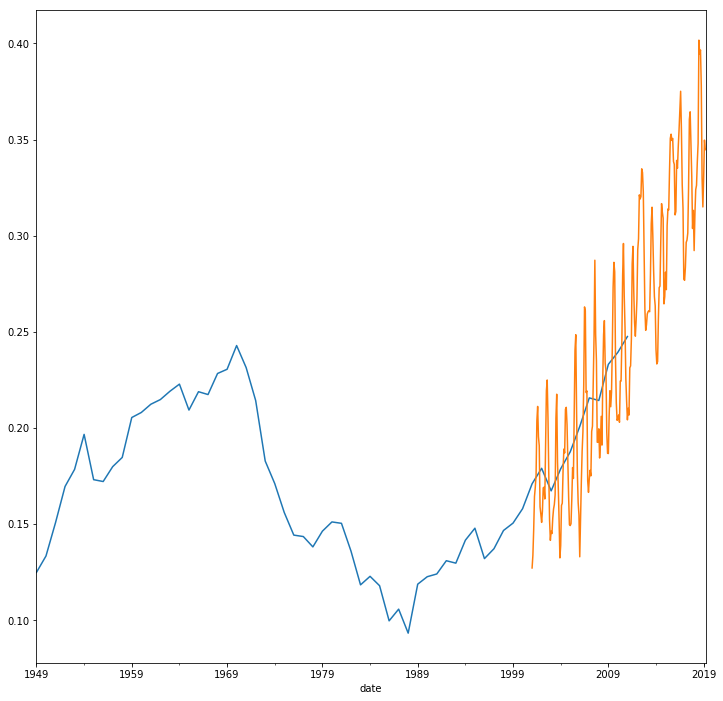

In [50]:
plt.figure(figsize = (12,12))
(df_past['Natural Gas']/df_past['Total']).plot()
(df_recent['Natural Gas']/df_recent['Total']).plot()

## Nuclear

In [51]:
(df_recent['Nuclear']/df_recent['Total']).describe()

count    220.000000
mean       0.196664
std        0.011538
min        0.166676
25%        0.188724
50%        0.198314
75%        0.204731
max        0.222864
dtype: float64

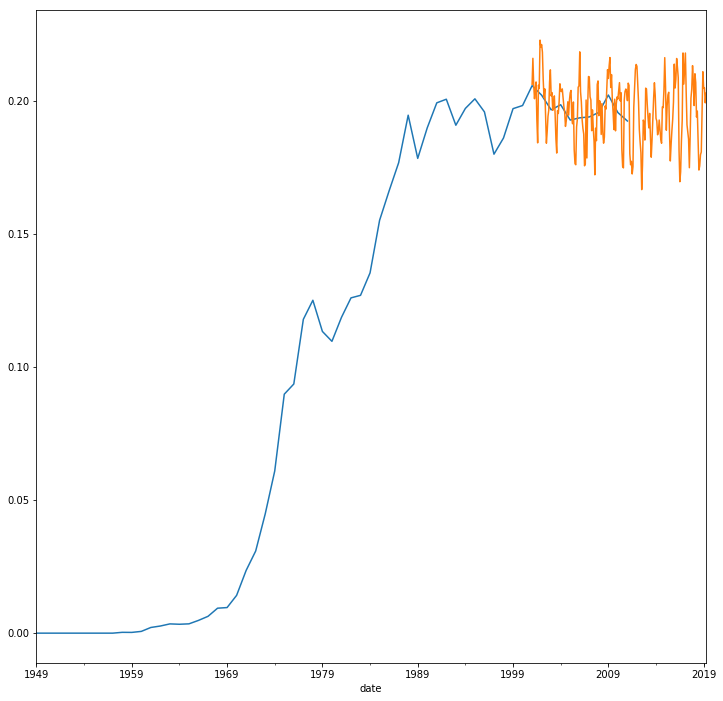

In [52]:
plt.figure(figsize = (12,12))
(df_past['Nuclear']/df_past['Total']).plot()
(df_recent['Nuclear']/df_recent['Total']).plot()

# Key Takeaways

- Coal has suffered a serious downturn in both absolute production and as a percentage of total production, going from almost 55% of total production to barely 20% now
- on the other hand, Natural Gas has exploded in popularity on both metrics, going from a low of 12% to a max of around 40% nowadays
- Nuclear, the third largest non-renewable producer, has seen very little change since the last nuclear plant was built and turned on in the late 90's and performance approached safe capacity limits. It's production has been remarkably stable and will likely continue to be so unless nuclear policy changes significantly. See [this link](https://www.world-nuclear.org/information-library/country-profiles/countries-t-z/usa-nuclear-power.aspx) for more